# Introduction
Your favorite local pizzeria, Papi's Pizzeria, has decided to explore the world of digital advertising.  They are starting with a month long search advertising campaign.  The campaign consists of multiple different ads, each one hoping to achieve a different goal.

In [1]:
# Importing Packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

There are three different files with data from this search campaign:
* impressions and impression related data
* clicks and click-related data
* conversions and conversion related data.

In [2]:
# Code Files

impressions_url = 'https://raw.githubusercontent.com/hangingbelay/spring2024/main/spring_2024_hw1_impressions.csv'
impressions = pd.read_csv(impressions_url)

clicks_url = 'https://raw.githubusercontent.com/hangingbelay/spring2024/main/spring_2024_hw1_clicks.csv'
clicks = pd.read_csv(clicks_url)

conversions_url = 'https://raw.githubusercontent.com/hangingbelay/spring2024/main/spring_2024_hw1_conversions.csv'
conversions = pd.read_csv(conversions_url)

In [3]:
# Data Inspection

impressions.head()

,date,hour,day_of_week,device,ad_id,total_impressions
0,2023-11-01,11,2,MOBILE,1001,173
1,2023-11-01,11,2,MOBILE,1002,32
2,2023-11-01,12,2,MOBILE,1001,65
3,2023-11-01,12,2,MOBILE,1002,125
4,2023-11-01,13,2,MOBILE,1001,167


In [4]:
clicks.head()

,date,hour,day_of_week,device,ad_id,total_clicks,avg_cost_per_click
0,2023-11-01,11,2,MOBILE,1001,3,2.898340
1,2023-11-01,12,2,MOBILE,1002,1,2.008006
2,2023-11-01,13,2,MOBILE,1001,4,3.760637
3,2023-11-01,13,2,MOBILE,1002,8,2.305475
4,2023-11-01,14,2,MOBILE,1001,3,1.135384


In [5]:
conversions.head()

,date,hour,day_of_week,device,ad_id,total_conversions,total_revenue
0,2023-11-01,13,2,MOBILE,1002,1,28.15
1,2023-11-01,19,2,MOBILE,1003,1,39.80
2,2023-11-01,20,2,MOBILE,1003,2,115.81
3,2023-11-02,11,3,MOBILE,1002,1,31.07
4,2023-11-02,14,3,MOBILE,1002,1,49.95


In [6]:
# Merging Data

join_key = ['date', 'hour', 'day_of_week', 'device', 'ad_id']
merged_data = impressions.merge(
    clicks.merge(conversions, on=join_key, how='outer'), on=join_key, how='outer')
merged_data.head()

,date,hour,day_of_week,device,ad_id,total_impressions,total_clicks,avg_cost_per_click,total_conversions,total_revenue
0,2023-11-01,11,2,MOBILE,1001,173,3.0,2.898340,NaN,NaN
1,2023-11-01,11,2,MOBILE,1002,32,NaN,NaN,NaN,NaN
2,2023-11-01,12,2,MOBILE,1001,65,NaN,NaN,NaN,NaN
3,2023-11-01,12,2,MOBILE,1002,125,1.0,2.008006,NaN,NaN
4,2023-11-01,13,2,MOBILE,1001,167,4.0,3.760637,NaN,NaN


In [7]:
# Filling missing values

merged_data.fillna(0, inplace=True)
merged_data.head()

,date,hour,day_of_week,device,ad_id,total_impressions,total_clicks,avg_cost_per_click,total_conversions,total_revenue
0,2023-11-01,11,2,MOBILE,1001,173,3.0,2.898340,0.0,0.0
1,2023-11-01,11,2,MOBILE,1002,32,0.0,0.000000,0.0,0.0
2,2023-11-01,12,2,MOBILE,1001,65,0.0,0.000000,0.0,0.0
3,2023-11-01,12,2,MOBILE,1002,125,1.0,2.008006,0.0,0.0
4,2023-11-01,13,2,MOBILE,1001,167,4.0,3.760637,0.0,0.0


In [8]:
# Computing Total_Cost and creating a new column in the data table

# Create a new column for total cost
merged_data['total_cost'] = merged_data['total_clicks'] * merged_data['avg_cost_per_click']
summary_data = merged_data.groupby('ad_id').agg(
    total_impressions=('total_impressions', 'sum'),
    total_clicks=('total_clicks', 'sum'),
    total_cost=('total_cost', 'sum'),
    total_conversions=('total_conversions', 'sum'),
    total_revenue=('total_revenue', 'sum'))

summary_data

,total_impressions,total_clicks,total_cost,total_conversions,total_revenue
ad_id,,,,,
1001,11878,306.0,702.555156,0.0,0.00
1002,16901,347.0,795.785114,25.0,1453.50
1003,15275,332.0,1463.714290,37.0,1680.83
1004,38207,904.0,2040.366411,84.0,0.00


Now to compute Click-Through-Rate (CTR), Conversion-Rate (CVR), Average-Cost-Per-Click, Cost-Per-Acquisition, and Return-On-Ad-Spend.

In [9]:
# Click-Through-Rate
summary_data['ctr'] = np.where(summary_data['total_impressions'] > 0, summary_data['total_clicks'] / summary_data['total_impressions'], 0)

# Conversion-Rate
summary_data['cvr'] = np.where(summary_data['total_clicks'] > 0, summary_data['total_conversions'] / summary_data['total_clicks'], 0)

# Average-Cost-Per-Click
summary_data['avg_cpc'] = np.where(summary_data['total_clicks'] > 0, summary_data['total_cost'] / summary_data['total_clicks'], 0)

# Cost-Per-Acquisition
summary_data['cpa'] = np.where(summary_data['total_conversions'] > 0, summary_data['total_cost'] / summary_data['total_conversions'], 0)

# Return-On-Ad-Spend
summary_data['roas'] = np.where(summary_data['total_cost'] > 0, summary_data['total_revenue'] / summary_data['total_cost'], 0)

summary_data

,total_impressions,total_clicks,total_cost,total_conversions,total_revenue,ctr,cvr,avg_cpc,cpa,roas
ad_id,,,,,,,,,,
1001,11878,306.0,702.555156,0.0,0.00,0.025762,0.000000,2.295932,0.000000,0.000000
1002,16901,347.0,795.785114,25.0,1453.50,0.020531,0.072046,2.293329,31.831405,1.826498
1003,15275,332.0,1463.714290,37.0,1680.83,0.021735,0.111446,4.408778,39.559846,1.148332
1004,38207,904.0,2040.366411,84.0,0.00,0.023661,0.092920,2.257042,24.290076,0.000000


Using the impression data to get the start and end date of each ad.

**Note**: Using the merged data will give the same answer in this case, but sometimes we might see conversions that happen days or weeks after a campaign has ended.

In [10]:
ad_dates = impressions.groupby('ad_id').agg(
    start_date=('date', min),
    end_date=('date', max),
)

ad_dates

<ipython-input-10-d97eacb12229>:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  ad_dates = impressions.groupby('ad_id').agg(
<ipython-input-10-d97eacb12229>:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  ad_dates = impressions.groupby('ad_id').agg(


,start_date,end_date
ad_id,,
1001,2023-11-01,2023-11-07
1002,2023-11-01,2023-11-30
1003,2023-11-01,2023-11-30
1004,2023-11-08,2023-11-30


In [11]:
# Formatting some columns to make it nicer

final_data = ad_dates.merge(summary_data, on='ad_id').round({'total_cost': 2, 'total_revenue': 2,
                                                             'avg_cpc': 2, 'cpa': 2, 'roas': 2})
final_data

,start_date,end_date,total_impressions,total_clicks,total_cost,total_conversions,total_revenue,ctr,cvr,avg_cpc,cpa,roas
ad_id,,,,,,,,,,,,
1001,2023-11-01,2023-11-07,11878,306.0,702.56,0.0,0.00,0.025762,0.000000,2.30,0.00,0.00
1002,2023-11-01,2023-11-30,16901,347.0,795.79,25.0,1453.50,0.020531,0.072046,2.29,31.83,1.83
1003,2023-11-01,2023-11-30,15275,332.0,1463.71,37.0,1680.83,0.021735,0.111446,4.41,39.56,1.15
1004,2023-11-08,2023-11-30,38207,904.0,2040.37,84.0,0.00,0.023661,0.092920,2.26,24.29,0.00


### As a sanity check, think about if the numbers make sense. In this case, we can see that:

The number of impressions is greater than the number of clicks, and the number of clicks is greater than the number of conversions
click through rate is between 2-2.5% for each ad, which seems reasonable for search engine advertising
cost per click for each ad is between  2− 5
we may decide to double check if ad id 1001 and 1004 have $0 revenue, and if ad id 1001 has 0 conversions.

This could reveal a problem with our code. In this case it's accurate.

### Key Findings

* Two of the ads (1002 and 1003) ran the entire month, while ad id 1001 only ran for the first week of the month, and then ad id 1004 ran after ad 1001 for the rest of the month.  This indicates maybe there is some relationship between ad 1001 and ad 1004.
* The click through rate for all four ads was similar, which indicates each ad received the same level of interest from users.
* ad id 1001 had 0 conversions and \$0 in revenue, even though the click through rate was similar to ads 1002 and 1003 which did have conversions and revenue.  This indicates the ad likely wasn't set up to track conversions.
* The average cost per click (cpc) of ad 1003 was nearly 2x the cpc of the other ads.
* Ad 1004 has the most impressions, clicks, and conversions: 2-3 times more than any other ad. It also has \$0 in revenue, indicating that maybe the "conversion" isn't really a sale - it could be something else.  Or it may not be feasible to track revenue from these conversions.
* Ad 1002 has by far the highest ROAS: 1.83 vs. 1.15 for ad 1003, and it wasn't possible to calculate ROAS for ads 1001 or 1004 without making additional assumptions.

###  Deeper Analysis

* ad id 1002 because it has the highest ROAS
* ad id 1003 because it has the highest cpc
* ad id 1004 because it received the most impressions, clicks, and conversions, and it also has the lowest (best) cost per acquisition.

* Why not ad id 1001
  - We cannot make a convincing case on why it is important since we dont have enough information. Even though it is the only ad with no conversions and revenue, we do not have enough information.

In [12]:
# Create a datetime column to make working w/ time series easier

merged_data['datetime'] = pd.to_datetime(merged_data['date'] + " " + merged_data['hour'].astype("str"),
                                         format="%Y-%m-%d %H")

# Ad 1002

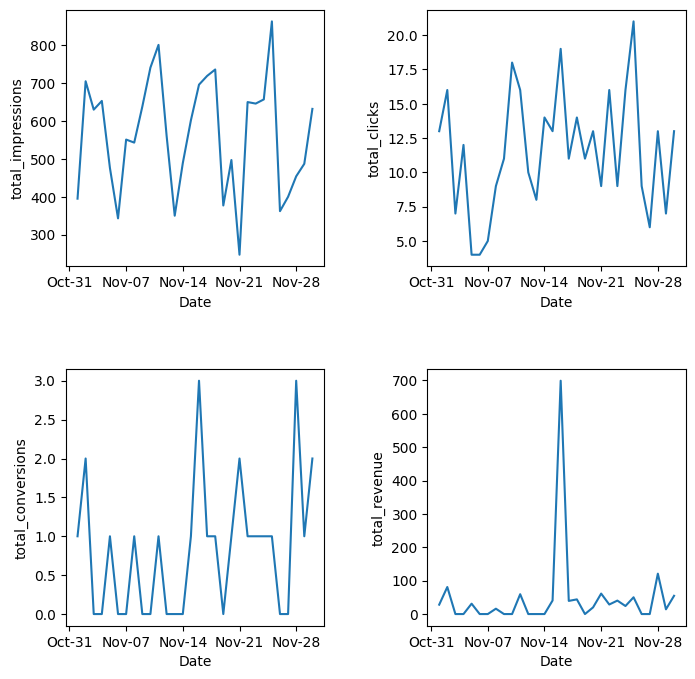

In [13]:
# Insert code for question #3 here
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter


ad_data = merged_data[merged_data["ad_id"] == 1002]

fig = plt.figure(figsize=(8, 8))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# This just sets up a grid of plots
date_form = DateFormatter("%b-%d")
# Ensure a major tick for each week using (interval=1)

plot_num = 1
for metric in ['total_impressions', 'total_clicks', 'total_conversions', 'total_revenue']:
  ax = fig.add_subplot(2, 2, plot_num)
  ax.xaxis.set_major_formatter(date_form)
  ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
  ax.plot(ad_data.groupby(ad_data["datetime"].dt.date)[metric].sum())
  plt.xlabel("Date")
  plt.ylabel(metric)
  plot_num += 1


Impressions, clicks, and conversions look okay, but revenue shows a big spike between November 14th and November 21st!

Let's investigate this more.

In [14]:
ad_data.groupby(ad_data["date"]).agg(
    total_revenue=('total_revenue', sum),
    total_conversions=('total_conversions', sum)).loc['2023-11-14':'2023-11-21']

<ipython-input-14-1848571d57c7>:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  ad_data.groupby(ad_data["date"]).agg(
<ipython-input-14-1848571d57c7>:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  ad_data.groupby(ad_data["date"]).agg(


,total_revenue,total_conversions
date,,
2023-11-14,0.00,0.0
2023-11-15,40.64,1.0
2023-11-16,699.17,3.0
2023-11-17,39.40,1.0
2023-11-18,43.99,1.0
2023-11-19,0.00,0.0
2023-11-20,19.98,1.0
2023-11-21,61.33,2.0


In this case we see that November 16th had $699 in total revenue from three conversions.  This will have a big impact on ROAS!  If we eliminate this day, what happens to ROAS?

In [15]:
filtered_data = ad_data[ad_data['date'] != '2023-11-16']
filtered_data.total_revenue.sum() / filtered_data.total_cost.sum()

1.007759513347639

So ROAS drops from \$1.83 to \$1.01!





# Ad 1003

In [16]:
ad_data.groupby(ad_data["datetime"].dt.date)["total_cost"].sum() / ad_data.groupby(ad_data["datetime"].dt.date)["total_clicks"].sum()

,0
datetime,
2023-11-01,1.907562
2023-11-02,2.073875
2023-11-03,2.516412
2023-11-04,2.615895
2023-11-05,2.794819
2023-11-06,2.976281
2023-11-07,2.017930
2023-11-08,1.883124
2023-11-09,2.775159


This shows a couple of interesting things. This ad is only active Weds - Sat. On November 22nd (the Wednesday before Thanksgiving), the CPC spiked to $10.27. Let's also look at impressions, clicks, conversions, and revenue like we did for ad 1002

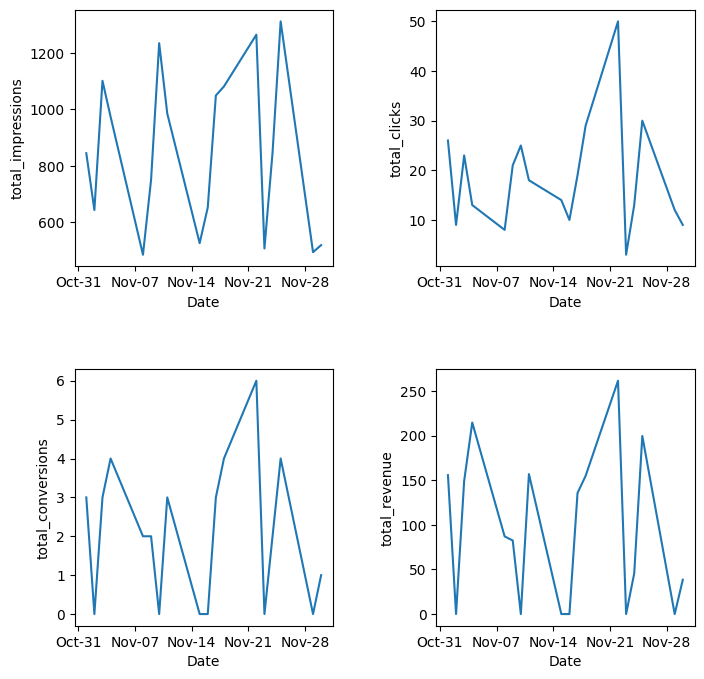

In [17]:
ad_data = merged_data[merged_data["ad_id"] == 1003]

fig = plt.figure(figsize=(8, 8))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# This just sets up a grid of plots
date_form = DateFormatter("%b-%d")
# Ensure a major tick for each week using (interval=1)

plot_num = 1
for metric in ['total_impressions', 'total_clicks', 'total_conversions', 'total_revenue']:
  ax = fig.add_subplot(2, 2, plot_num)
  ax.xaxis.set_major_formatter(date_form)
  ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
  ax.plot(ad_data.groupby(ad_data["datetime"].dt.date)[metric].sum())
  plt.xlabel("Date")
  plt.ylabel(metric)
  plot_num += 1

Clicks definitely seems to increase around Nov. 22nd as well.  Let's check the CTR.

In [18]:
ad_data.groupby(ad_data["datetime"].dt.date)["total_clicks"].sum() / ad_data.groupby(ad_data["datetime"].dt.date)["total_impressions"].sum()

,0
datetime,
2023-11-01,0.030769
2023-11-02,0.013975
2023-11-03,0.020890
2023-11-04,0.013347
2023-11-08,0.016461
2023-11-09,0.027963
2023-11-10,0.020259
2023-11-11,0.018274
2023-11-15,0.026565


CTR is quite high on the 22nd as well. If we calculate ROAS by omitting the 22nd:

In [19]:
filtered_data = ad_data[ad_data['date'] != '2023-11-22']
filtered_data.total_revenue.sum() / filtered_data.total_cost.sum()

1.4945334463052604

We see that ROAS increases from \$1.15 to \$1.49!

# Ad 1004

For this ad we can also look at impressions, clicks, and conversions:

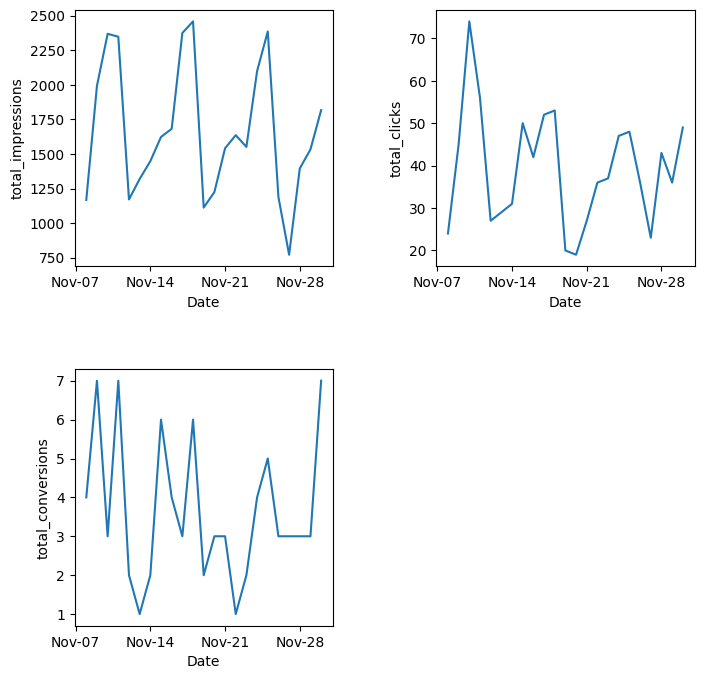

In [20]:
ad_data = merged_data[merged_data["ad_id"] == 1004]

fig = plt.figure(figsize=(8, 8))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# This just sets up a grid of plots
date_form = DateFormatter("%b-%d")
# Ensure a major tick for each week using (interval=1)

plot_num = 1
for metric in ['total_impressions', 'total_clicks', 'total_conversions']:
  ax = fig.add_subplot(2, 2, plot_num)
  ax.xaxis.set_major_formatter(date_form)
  ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
  ax.plot(ad_data.groupby(ad_data["datetime"].dt.date)[metric].sum())
  plt.xlabel("Date")
  plt.ylabel(metric)
  plot_num += 1

There doesn't seem to be anything too interesting in these graphs. Let's investigate cost per acquistion:

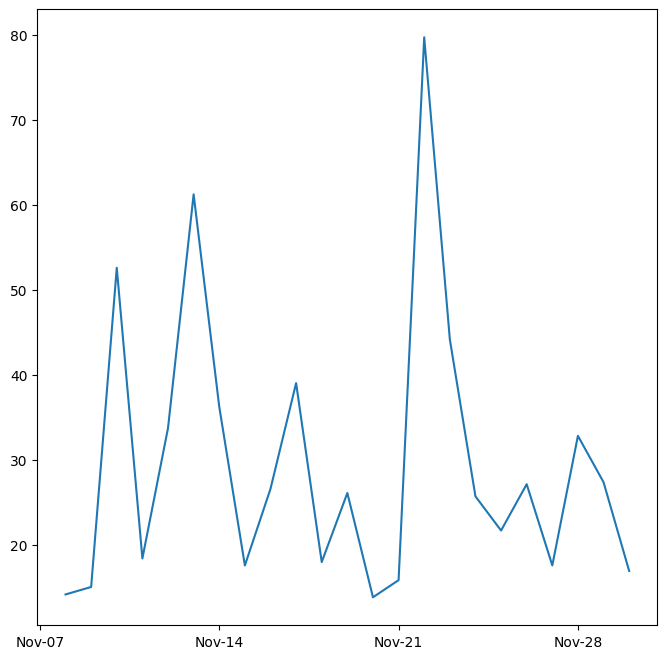

In [21]:
cpa = ad_data.groupby(ad_data["datetime"].dt.date)["total_cost"].sum() / ad_data.groupby(ad_data["datetime"].dt.date)["total_conversions"].sum()

fig = plt.figure(figsize=(8, 8))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(1, 1, 1)
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax.plot(cpa)

The graph of CPA shows that it is pretty noisy, although we do see that there is a spike on Nov. 22nd.

Now we should ask ->

What is your analysis of the overall effectiveness of this search campaign, and should Papi's Pizzeria invest in more search campaigns going forward?

In [22]:
# A trick to groupby all rows:
campaign_data = merged_data.groupby(lambda x: 0).agg(
    total_impressions=('total_impressions', 'sum'),
    total_clicks=('total_clicks', 'sum'),
    total_cost=('total_cost', 'sum'),
    total_conversions=('total_conversions', 'sum'),
    total_revenue=('total_revenue', 'sum'))
campaign_data['ctr'] = np.where(campaign_data['total_impressions'] > 0, campaign_data['total_clicks'] / campaign_data['total_impressions'], 0)
campaign_data['cvr'] = np.where(campaign_data['total_clicks'] > 0, campaign_data['total_conversions'] / campaign_data['total_clicks'], 0)
campaign_data['avg_cpc'] = np.where(campaign_data['total_clicks'] > 0, campaign_data['total_cost'] / campaign_data['total_clicks'], 0)
campaign_data['cpa'] = np.where(campaign_data['total_conversions'] > 0, campaign_data['total_cost'] / campaign_data['total_conversions'], 0)
campaign_data['roas'] = np.where(campaign_data['total_cost'] > 0, campaign_data['total_revenue'] / campaign_data['total_cost'], 0)
campaign_data

,total_impressions,total_clicks,total_cost,total_conversions,total_revenue,ctr,cvr,avg_cpc,cpa,roas
0,82261,1889.0,5002.420971,146.0,3134.33,0.022963,0.07729,2.648185,34.263157,0.626563


Looking at the campaign as a whole, we see that the ROAS for the campaign is $3134 / $5002 = 0.63. Based on this, we would conclude that it's not a good investment to keep investing in advertising, as the costs are greater than the revenue generated. However, this ignores the fact that ad 1001 and ad 1004 generated $0 in revenue. Since the click through rates for these ads were roughly equal to the CTRs for ad 1002 and ad 1003, it might be reasonable to assume that ads were as effective at generating revenue. It could also be the case that these ads were meant to generate something other than revenue, such as newsletter or loyalty program signups. In either case, we should try to account for the value of this when making a decision about the overall campaign effectiveness.

For ad 1001, let's assume the conversion rate is similar to the other three ads:

In [23]:
merged_data_no_ad_1001 = merged_data[merged_data['ad_id'] != 1001]
avg_cvr_no_ad_1001 = merged_data_no_ad_1001['total_conversions'].sum() / merged_data_no_ad_1001['total_clicks'].sum()
conversions_for_ad_1001 = summary_data.loc[1001]['total_clicks'] * avg_cvr_no_ad_1001
print(conversions_for_ad_1001)

28.22236260265319


Let's modify the final data, adding in some additional assumptions

In [24]:
final_data_modified = final_data.copy()
final_data_modified.loc[1001, 'total_conversions'] = conversions_for_ad_1001

Now let's make some assumptions about revenue generated by these ads. Suppose these conversions were newsletter or loyalty program signups, and we assign a value of $10 per conversion.

In [25]:
conversion_value = 10
final_data_modified.loc[1001, 'total_revenue'] = conversion_value * final_data_modified.loc[1001, 'total_conversions']
final_data_modified.loc[1004, 'total_revenue'] = conversion_value * final_data_modified.loc[1004, 'total_conversions']
final_data_modified['total_revenue'].sum()

4256.553626026532

This makes the total revenue \$4256, which is still less than the total cost of \$5002.  If we assume each conversion has a \$20 value, the ROAS is now > 1.

In [26]:
conversion_value = 20
final_data_modified.loc[1001, 'total_revenue'] = conversion_value * final_data_modified.loc[1001, 'total_conversions']
final_data_modified.loc[1004, 'total_revenue'] = conversion_value * final_data_modified.loc[1004, 'total_conversions']
final_data_modified['total_revenue'].sum()

5378.777252053063

Another way to approach this would be to compute the revenue per conversion for ads that were tracking both revenue and conversions, and multiply that by the number of conversions for ad 1004 and ad 1001.

In [27]:
revenue_and_conversion_data = merged_data[merged_data['ad_id'].isin([1002, 1003])][['total_revenue', 'total_conversions']].sum()
revenue_per_conversion = revenue_and_conversion_data['total_revenue'] / revenue_and_conversion_data['total_conversions']
final_data_modified.loc[1001, 'total_revenue'] = revenue_per_conversion * final_data_modified.loc[1001, 'total_conversions']
final_data_modified.loc[1004, 'total_revenue'] = revenue_per_conversion * final_data_modified.loc[1004, 'total_conversions']
estimated_total_revenue = final_data_modified['total_revenue'].sum()
print("Revenue per conversion: %.2f" % revenue_per_conversion)
print("Estimated total revenue: %.2f" % estimated_total_revenue)
print("Estimated ROAS: %.2f" % (estimated_total_revenue / final_data_modified['total_cost'].sum()))

Revenue per conversion: 50.55
Estimated total revenue: 8807.59
Estimated ROAS: 1.76


Based on the investigation from question #3, we may want to further adjust revenue or cost.  For example, we may want to discount the large revenue from November 16th.  Or we may decide that the costs from November 22nd aren't typical, and we may decrease those.  These kinds of assumptions usually end up being judgement calls, but it's important to acknowledge them and watch for similar issues in the future.  For this particular campaign, even by making assumptions that increase revenue or decrease cost, it seems unlikely we will get a ROAS that is not in the range for of 2-5x that we discussed in the first couple of lectures.
<p>
Also note that this advertising could have brought in new customers that will become more frequent visitors over time.  This gets into "Customer Lifetime Value" analysis (which unfortunately we won't really talk about in this class)

---


Finally, as we learn more about causality, we will understand that the real question to ask is how do the results from the campaign compare to the unobserved counterfactual:

if Papi's Pizzeria had done nothing at all - i.e. they just ran their business as usual.   